In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\AAPL_data.csv")

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [4]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL
1255,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL
1256,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL
1257,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL
1258,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL


In [5]:
df1=df.reset_index()['high']

In [6]:
df1

0        68.4014
1        69.2771
2        68.9114
3        67.6628
4        67.3771
          ...   
1254    168.6200
1255    166.8000
1256    163.8800
1257    163.7200
1258    163.4000
Name: high, Length: 1259, dtype: float64

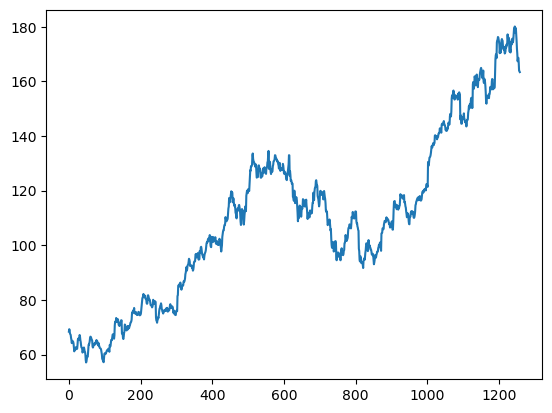

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
df1

0        68.4014
1        69.2771
2        68.9114
3        67.6628
4        67.3771
          ...   
1254    168.6200
1255    166.8000
1256    163.8800
1257    163.7200
1258    163.4000
Name: high, Length: 1259, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.09198687],
       [0.09910555],
       [0.09613273],
       ...,
       [0.86814541],
       [0.86684475],
       [0.86424343]])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.09198687],
       [0.09910555],
       [0.09613273],
       ...,
       [0.86814541],
       [0.86684475],
       [0.86424343]])

In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(818, 441)

In [15]:
train_data

array([[0.09198687],
       [0.09910555],
       [0.09613273],
       [0.08598269],
       [0.08366019],
       [0.08194088],
       [0.07331261],
       [0.06745964],
       [0.05756567],
       [0.06038729],
       [0.06447543],
       [0.06031738],
       [0.06136278],
       [0.05605608],
       [0.04480292],
       [0.03321321],
       [0.04133015],
       [0.04140006],
       [0.0376379 ],
       [0.04160898],
       [0.04576704],
       [0.04561583],
       [0.04052943],
       [0.04069202],
       [0.05182893],
       [0.067193  ],
       [0.07126895],
       [0.06738973],
       [0.06779618],
       [0.07258099],
       [0.08169701],
       [0.07692439],
       [0.06642642],
       [0.06064173],
       [0.05121112],
       [0.04475659],
       [0.04375751],
       [0.04110985],
       [0.02943885],
       [0.0324003 ],
       [0.03356114],
       [0.04350226],
       [0.04458181],
       [0.04012298],
       [0.03285309],
       [0.03136627],
       [0.02438741],
       [0.007

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 321ms/step - loss: 0.0455 - val_loss: 0.0363
Epoch 2/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0068 - val_loss: 0.0048
Epoch 3/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0036 - val_loss: 0.0139
Epoch 4/100
12/12 [==============================] - 3s 227ms/step - loss: 0.0017 - val_loss: 0.0070
Epoch 5/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 6/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 7/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 8/100
12/12 [==============================] - 2s 205ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 9/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 10/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0012 - val_lo

12/12 [==============================] - 2s 206ms/step - loss: 3.4675e-04 - val_loss: 0.0019
Epoch 79/100
12/12 [==============================] - 2s 207ms/step - loss: 3.3562e-04 - val_loss: 3.6361e-04
Epoch 80/100
12/12 [==============================] - 3s 217ms/step - loss: 3.7648e-04 - val_loss: 3.7300e-04
Epoch 81/100
12/12 [==============================] - 3s 229ms/step - loss: 4.0176e-04 - val_loss: 3.5161e-04
Epoch 82/100
12/12 [==============================] - 3s 216ms/step - loss: 3.8003e-04 - val_loss: 3.5525e-04
Epoch 83/100
12/12 [==============================] - 2s 207ms/step - loss: 3.3133e-04 - val_loss: 5.9896e-04
Epoch 84/100
12/12 [==============================] - 2s 206ms/step - loss: 3.0912e-04 - val_loss: 4.5677e-04
Epoch 85/100
12/12 [==============================] - 2s 205ms/step - loss: 3.4703e-04 - val_loss: 3.5121e-04
Epoch 86/100
12/12 [==============================] - 3s 213ms/step - loss: 3.1421e-04 - val_loss: 8.1597e-04
Epoch 87/100
12/12 [=======

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.13.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 44ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.01735709116068775

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.031112236111446572

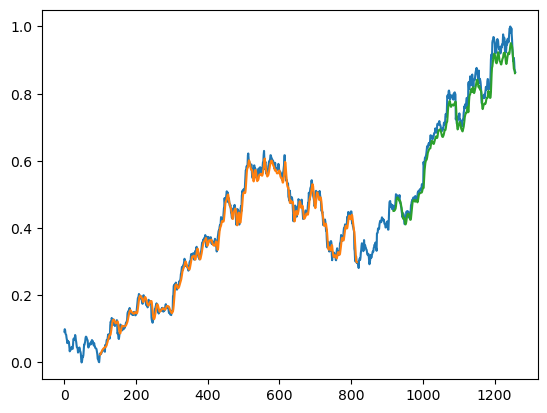

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

441

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.8444896243770034,
 0.8406689303601288,
 0.8347346609296643,
 0.8224596652584292,
 0.8024619901913844,
 0.7737661393837952,
 0.7701893194531043,
 0.7871792141238864,
 0.7936735810389522,
 0.7901057031580881,
 0.7888863327271708,
 0.7914876563131278,
 0.796690303485042,
 0.7866914659515195,
 0.7995355011571826,
 0.7999419579674883,
 0.810022086863072,
 0.8203460898448393,
 0.812054370914601,
 0.8152247340349862,
 0.8144931117764357,
 0.836604362257071,
 0.8436767107563917,
 0.8423760489634132,
 0.8128672845352126,
 0.8183138057933103,
 0.8178260576209432,
 0.8156311908452919,
 0.8166879785520872,
 0.8189600721216964,
 0.865869252599088,
 0.9022064914404261,
 0.9150497137324686,
 0.9174079761458628,
 0.9057020200090559,
 0.9525258445562833,
 0.958460113986748,
 0.9605736894003382,
 0.9686215342443928,
 0.9674428094945059,
 0.961630477107133,
 0.9544768372457512,
 0.9461851183155129,
 0.9204946091633252,
 0.9330972090236663,
 0.9291952236447306,
 0.9224480405936547,
 0.9479735282808585,

In [37]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8431563]
101
1 day input [0.84066893 0.83473466 0.82245967 0.80246199 0.77376614 0.77018932
 0.78717921 0.79367358 0.7901057  0.78888633 0.79148766 0.7966903
 0.78669147 0.7995355  0.79994196 0.81002209 0.82034609 0.81205437
 0.81522473 0.81449311 0.83660436 0.84367671 0.84237605 0.81286728
 0.81831381 0.81782606 0.81563119 0.81668798 0.81896007 0.86586925
 0.90220649 0.91504971 0.91740798 0.90570202 0.95252584 0.95846011
 0.96057369 0.96862153 0.96744281 0.96163048 0.95447684 0.94618512
 0.92049461 0.93309721 0.92919522 0.92244804 0.94797353 0.95854141
 0.96260597 0.95919174 0.95748462 0.9416328  0.93529208 0.93147138
 0.93919406 0.93025201 0.91955976 0.92147254 0.92602486 0.94138893
 0.93732436 0.94667287 0.94333992 0.95179422 0.97642551 0.96171177
 0.96195564 0.96683312 0.96198816 0.92984555 0.92423645 0.93293463
 0.92269191 0.93659274 0.95488329 0.94610383 0.96154919 0.96350018
 0.95902915 0.95285101 0.9625133  0.97772617 0.99422831 0.99309023
 1.         0.99577285 0.9811404  0

8 day output [[0.7533207]]
9 day input [0.7901057  0.78888633 0.79148766 0.7966903  0.78669147 0.7995355
 0.79994196 0.81002209 0.82034609 0.81205437 0.81522473 0.81449311
 0.83660436 0.84367671 0.84237605 0.81286728 0.81831381 0.81782606
 0.81563119 0.81668798 0.81896007 0.86586925 0.90220649 0.91504971
 0.91740798 0.90570202 0.95252584 0.95846011 0.96057369 0.96862153
 0.96744281 0.96163048 0.95447684 0.94618512 0.92049461 0.93309721
 0.92919522 0.92244804 0.94797353 0.95854141 0.96260597 0.95919174
 0.95748462 0.9416328  0.93529208 0.93147138 0.93919406 0.93025201
 0.91955976 0.92147254 0.92602486 0.94138893 0.93732436 0.94667287
 0.94333992 0.95179422 0.97642551 0.96171177 0.96195564 0.96683312
 0.96198816 0.92984555 0.92423645 0.93293463 0.92269191 0.93659274
 0.95488329 0.94610383 0.96154919 0.96350018 0.95902915 0.95285101
 0.9625133  0.97772617 0.99422831 0.99309023 1.         0.99577285
 0.9811404  0.99463477 0.97723842 0.95813495 0.934154   0.91919639
 0.8965161  0.90522809 0

16 day output [[0.6761547]]
17 day input [0.82034609 0.81205437 0.81522473 0.81449311 0.83660436 0.84367671
 0.84237605 0.81286728 0.81831381 0.81782606 0.81563119 0.81668798
 0.81896007 0.86586925 0.90220649 0.91504971 0.91740798 0.90570202
 0.95252584 0.95846011 0.96057369 0.96862153 0.96744281 0.96163048
 0.95447684 0.94618512 0.92049461 0.93309721 0.92919522 0.92244804
 0.94797353 0.95854141 0.96260597 0.95919174 0.95748462 0.9416328
 0.93529208 0.93147138 0.93919406 0.93025201 0.91955976 0.92147254
 0.92602486 0.94138893 0.93732436 0.94667287 0.94333992 0.95179422
 0.97642551 0.96171177 0.96195564 0.96683312 0.96198816 0.92984555
 0.92423645 0.93293463 0.92269191 0.93659274 0.95488329 0.94610383
 0.96154919 0.96350018 0.95902915 0.95285101 0.9625133  0.97772617
 0.99422831 0.99309023 1.         0.99577285 0.9811404  0.99463477
 0.97723842 0.95813495 0.934154   0.91919639 0.8965161  0.90522809
 0.90667752 0.89188249 0.86814541 0.86684475 0.86424343 0.84315628
 0.83301222 0.8214528 

24 day output [[0.61031616]]
25 day input [0.81831381 0.81782606 0.81563119 0.81668798 0.81896007 0.86586925
 0.90220649 0.91504971 0.91740798 0.90570202 0.95252584 0.95846011
 0.96057369 0.96862153 0.96744281 0.96163048 0.95447684 0.94618512
 0.92049461 0.93309721 0.92919522 0.92244804 0.94797353 0.95854141
 0.96260597 0.95919174 0.95748462 0.9416328  0.93529208 0.93147138
 0.93919406 0.93025201 0.91955976 0.92147254 0.92602486 0.94138893
 0.93732436 0.94667287 0.94333992 0.95179422 0.97642551 0.96171177
 0.96195564 0.96683312 0.96198816 0.92984555 0.92423645 0.93293463
 0.92269191 0.93659274 0.95488329 0.94610383 0.96154919 0.96350018
 0.95902915 0.95285101 0.9625133  0.97772617 0.99422831 0.99309023
 1.         0.99577285 0.9811404  0.99463477 0.97723842 0.95813495
 0.934154   0.91919639 0.8965161  0.90522809 0.90667752 0.89188249
 0.86814541 0.86684475 0.86424343 0.84315628 0.83301222 0.8214528
 0.8095544  0.79776865 0.78623033 0.77497351 0.76400489 0.75332069
 0.74290895 0.7327520

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

1259

In [41]:

scaler.inverse_transform(lst_output)

array([[0.84315628],
       [0.83301222],
       [0.8214528 ],
       [0.8095544 ],
       [0.79776865],
       [0.78623033],
       [0.77497351],
       [0.76400489],
       [0.75332069],
       [0.74290895],
       [0.73275208],
       [0.7228303 ],
       [0.71312374],
       [0.70361495],
       [0.69428992],
       [0.68513864],
       [0.67615467],
       [0.66733479],
       [0.65867877],
       [0.65018857],
       [0.64186633],
       [0.63371527],
       [0.6257385 ],
       [0.61793834],
       [0.61031616],
       [0.60287285],
       [0.59560794],
       [0.58852017],
       [0.58160764],
       [0.57486725]])

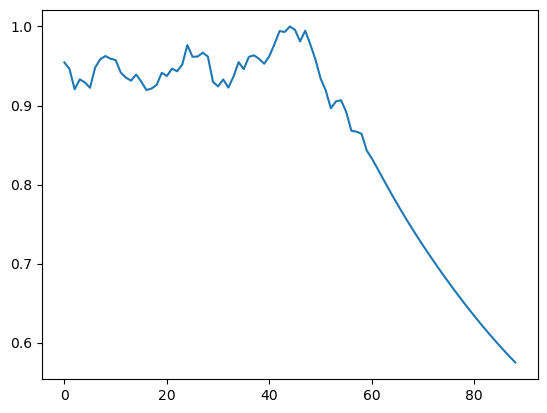

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [57]:
df3=scaler.inverse_transform(df3).tolist()

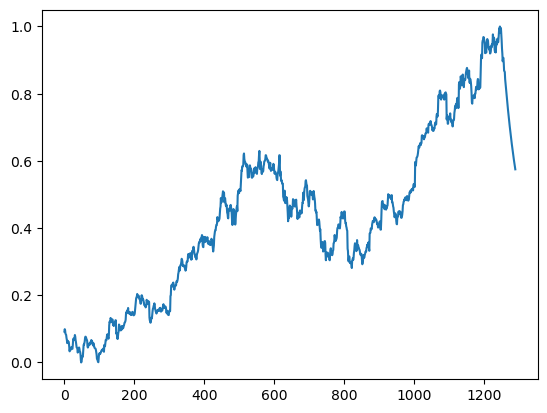

In [58]:
plt.plot(df3)